<a href="https://colab.research.google.com/github/AnastasiiaDm/machine-learning/blob/main/DZ_8_decision_tree/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
pip install lightgbm

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
from sklearn import tree

import graphviz
from sklearn.tree import export_graphviz

In [59]:
from google.colab import drive
drive.mount('/content/drive')

columns = ['A' + str(column) for column in range(1, 17)]

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/crx.data', names=columns)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [60]:
# Handle missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Feature engineering (Example: Adding credit-to-income ratio)
df['A17'] = df['A15'] / (df['A3'] + 1)  # Avoid division by zero


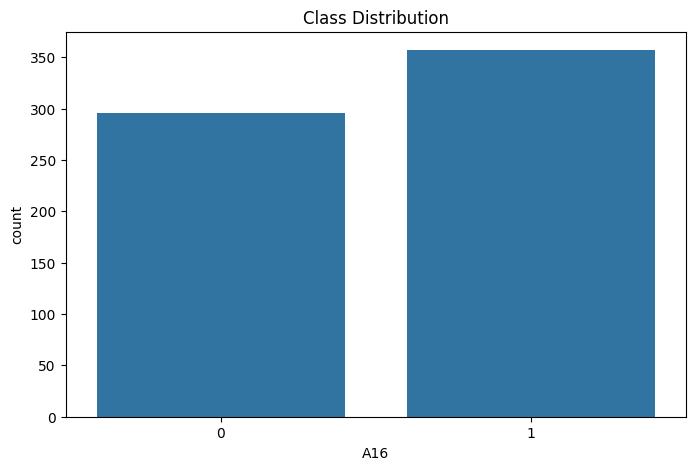

In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(x='A16', data=df)
plt.title("Class Distribution")
plt.show()

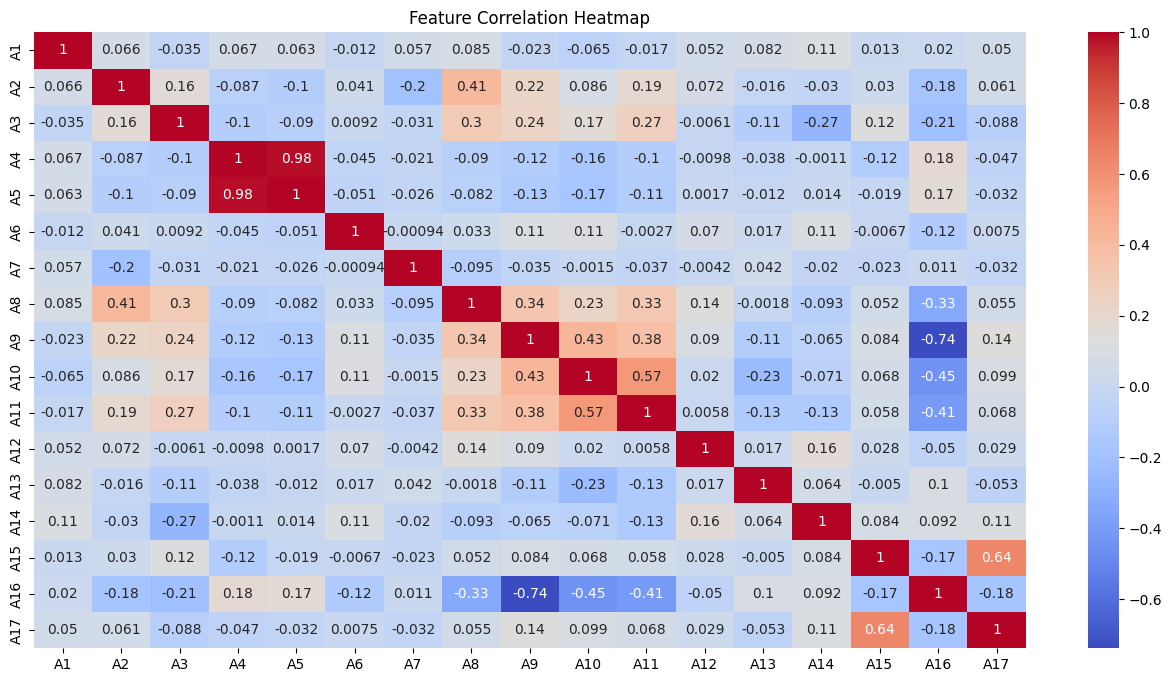

In [69]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [62]:
X = df.drop(columns=['A16'])
y = df['A16']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy after Decision Tree predict:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy after Decision Tree predict: 0.8015267175572519
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        55
           1       0.85      0.80      0.82        76

    accuracy                           0.80       131
   macro avg       0.80      0.80      0.80       131
weighted avg       0.80      0.80      0.80       131



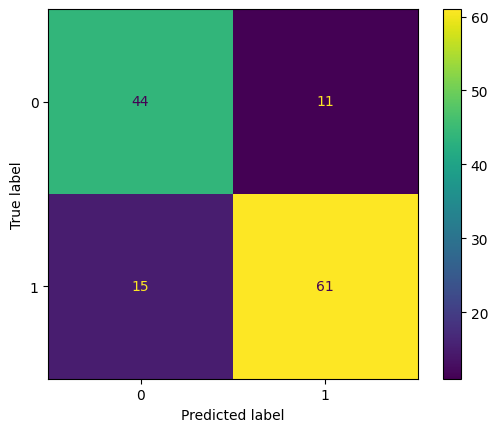

In [76]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

[Text(0.4099576271186441, 0.9615384615384616, 'x[8] <= 0.5\ngini = 0.497\nsamples = 522\nvalue = [241, 281]'),
 Text(0.1281779661016949, 0.8846153846153846, 'x[2] <= 0.168\ngini = 0.102\nsamples = 240\nvalue = [13, 227]'),
 Text(0.2690677966101695, 0.9230769230769231, 'True  '),
 Text(0.05084745762711865, 0.8076923076923077, 'x[7] <= 1.25\ngini = 0.401\nsamples = 18\nvalue = [5, 13]'),
 Text(0.03389830508474576, 0.7307692307692307, 'x[1] <= 7.5\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.01694915254237288, 0.6538461538461539, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05084745762711865, 0.6538461538461539, 'x[13] <= 123.5\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.03389830508474576, 0.5769230769230769, 'x[5] <= 9.5\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.01694915254237288, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.05084745762711865, 0.5, 'x[2] <= 0.083\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0338983050847457

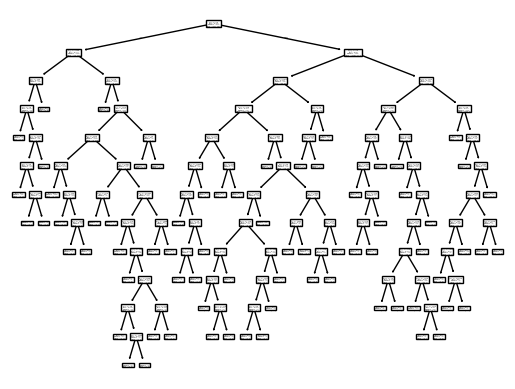

In [81]:
tree.plot_tree(clf)


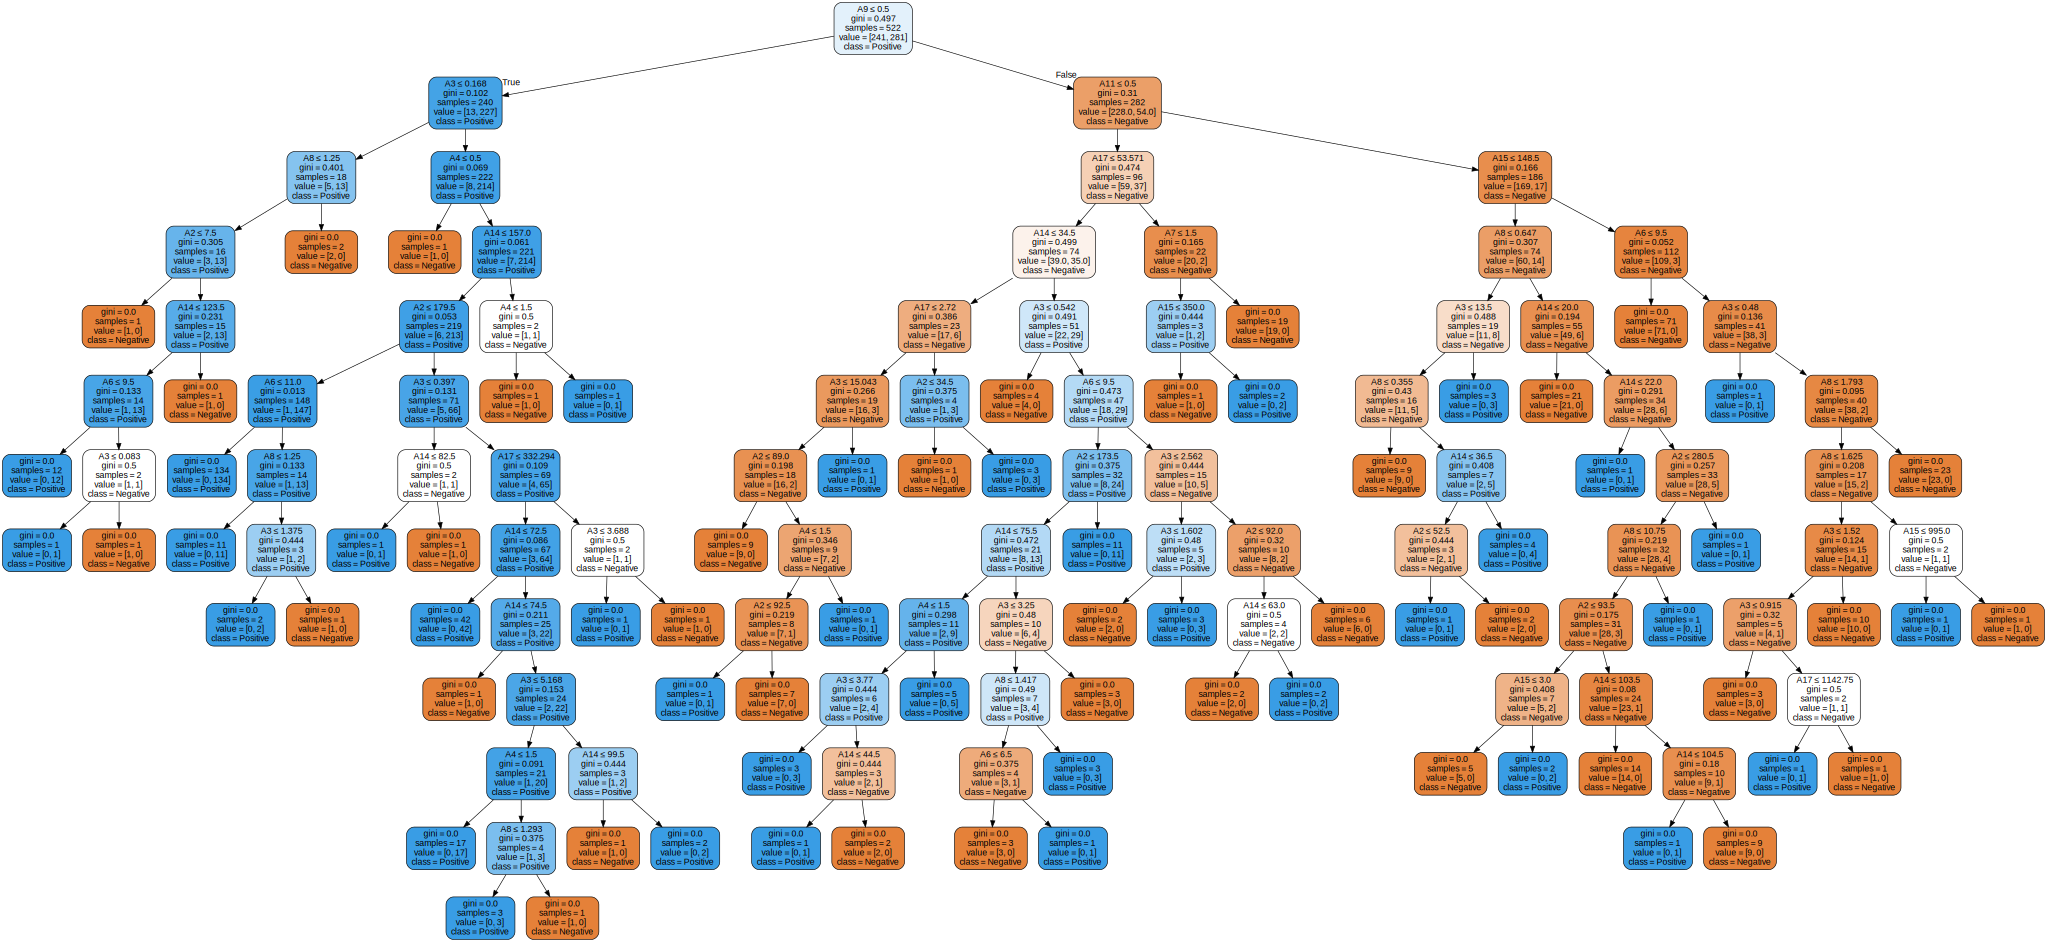

In [5]:
dot_data = export_graphviz(
    clf,
    feature_names=X.columns,
    class_names=['Negative', 'Positive'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph  #

In [63]:
years_at_company = [1, 2, 0, 2, 25, 1, 4, 5, 15, 0, 1, 2, 5, 15, 2, 3, 2, 15,
                    2, 7, 3, 0, 1, 0, 1, 5, 8, 0, 0, 4, 1, 3, 0, 9, 12, 2, 14,
                    0, 1, 35, 3, 7, 0, 11, 5, 13, 1, 6, 9, 2, 0, 3, 7, 13, 0,
                    11, 1, 2, 0, 20, 37, 2, 1, 18, 27, 30, 1, 10, 18, 30, 25,
                    11, 2, 7, 13, 3, 1, 9, 5, 6, 0, 6, 25, 0, 1, 5, 0, 5, 5,
                    7, 7, 1, 12, 2, 5, 5, 25, 0, 10, 2, 1, 13, 2, 2, 1, 1, 5,
                    2, 5, 1, 1, 5, 2, 5, 20, 20, 3, 13, 2, 20, 20, 10, 13, 1]

# Add as a new column
if len(years_at_company) < len(df):
    extra_values = np.random.choice(years_at_company, size=len(df)-len(years_at_company), replace=True)
    years_at_company.extend(extra_values)

df["YearsAtCompany"] = years_at_company[:len(df)]

In [64]:
credit_screening_pos = {1, 2, 4, 5, 6, 7, 8, 9, 14, 15, 17, 18, 19,
                        21, 22, 24, 28, 29, 31, 32, 35, 38, 40, 41,
                        42, 43, 45, 46, 47, 49, 50, 51, 53, 54, 55,
                        56, 57, 59, 61, 62, 63, 64, 65, 66, 69, 70,
                        71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                        83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94,
                        96, 97, 98, 100, 103, 104, 106, 108, 110, 116,
                        117, 118, 119, 121, 122, 123, 124}

credit_screening_neg = {3, 10, 11, 12, 13, 16, 20, 23, 25, 26, 27,
                        30, 33, 34, 36, 37, 39, 44, 48, 52, 58, 60,
                        67, 68, 82, 88, 95, 99, 101, 102, 105, 107,
                        109, 111, 112, 113, 114, 115, 120, 125}

jobless_pos = {3, 10, 12, 23, 34, 39, 44, 56, 60, 82, 85, 88, 99, 115}

df["CreditScreening"] = df.index.isin(credit_screening_pos).astype(int)
df["Jobless"] = df.index.isin(jobless_pos).astype(int)

In [65]:
def purchase_item(row):
    if row['A5'] == 'g' and row['A9'] == 't':  # A5 and A9 are just examples
        return 'stereo'
    elif row['A6'] == 'v' and row['A14'] == 'g':  # More conditions for other items
        return 'jewel'
    elif row['A3'] > 5:
        return 'bike'
    elif row['YearsAtCompany'] > 10:
        return 'furniture'
    else:
        return 'none'  # No purchase

df['purchase_item'] = df.apply(purchase_item, axis=1)

In [66]:
def is_male(row):
    male_columns = [6, 7, 8, 9, 10, 16, 17, 18, 19, 20, 21, 22, 25, 27, 29, 37, 38, 39, 40, 41, 42, 43, 45, 48, 49, 51, 58, 59, 60, 61, 62, 68, 69, 70, 71, 72, 74, 76, 77, 79, 80, 82, 84, 86, 89, 90, 91, 92, 94, 97, 98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 121, 122, 123, 124, 125]
    return 1 if row.name in male_columns else 0

def is_female(row):
    female_columns = [1, 2, 3, 4, 5, 11, 12, 13, 14, 15, 23, 24, 26, 28, 30, 31, 32, 33, 34, 35, 36, 44, 46, 47, 50, 52, 53, 54, 55, 56, 57, 63, 64, 65, 66, 67, 73, 75, 78, 81, 83, 85, 87, 88, 93, 95, 96, 99, 100, 101, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
    return 1 if row.name in female_columns else 0

def is_unmarried(row):
    unmarried_columns = [1, 2, 5, 6, 7, 11, 13, 14, 16, 18, 22, 25, 26, 28, 30, 31, 32, 33, 34, 37, 41, 43, 46, 48, 50, 52, 53, 54, 55, 59, 60, 63, 68, 70, 74, 75, 76, 78, 82, 84, 86, 87, 90, 93, 95, 96, 97, 100, 101, 102, 104, 105, 106, 107, 108, 109, 114, 118, 123]
    return 1 if row.name in unmarried_columns else 0

def is_problematic_region(row):
    problematic_columns = [3, 5, 23, 30, 33, 39, 48, 60, 68, 72, 76, 78, 84, 105]
    return 1 if row.name in problematic_columns else 0

df['is_male'] = df.apply(is_male, axis=1)
df['is_female'] = df.apply(is_female, axis=1)
df['is_unmarried'] = df.apply(is_unmarried, axis=1)
df['is_problematic_region'] = df.apply(is_problematic_region, axis=1)

In [67]:
age_data = {
    1: 18, 2: 20, 3: 25, 4: 40, 5: 50, 6: 18, 7: 22, 8: 28, 9: 40, 10: 50,
    11: 18, 12: 20, 13: 25, 14: 38, 15: 50, 16: 19, 17: 21, 18: 25, 19: 38,
    20: 50, 21: 42, 22: 28, 23: 55, 24: 21, 25: 81, 26: 23, 27: 35, 28: 47, 29: 98,
    30: 68, 31: 27, 32: 19, 33: 23, 34: 25, 35: 31, 36: 34, 37: 20, 38: 32, 39: 38,
    40: 45, 41: 57, 42: 25, 43: 42, 44: 61, 45: 48, 46: 29, 47: 35, 48: 40, 49: 31,
    50: 37, 51: 23, 52: 70, 53: 21, 54: 29, 55: 37, 56: 43, 57: 51, 58: 19, 59: 24,
    60: 33, 61: 42, 62: 59, 63: 32, 64: 37, 65: 41, 66: 50, 67: 55, 68: 37, 69: 40,
    70: 46, 71: 57, 72: 63, 73: 52, 74: 27, 75: 35, 76: 26, 77: 59, 78: 23, 79: 51,
    80: 38, 81: 48, 82: 67, 83: 33, 84: 37, 85: 52, 86: 29, 87: 23, 88: 70, 89: 25,
    90: 65, 91: 30, 92: 35, 93: 27, 94: 40, 95: 37, 96: 40, 97: 27, 98: 55, 99: 60,
    100: 45, 101: 20, 102: 18, 103: 35, 104: 35, 105: 35, 106: 18, 107: 18, 108: 22,
    109: 22, 110: 25, 111: 18, 112: 18, 113: 22, 114: 22, 115: 25, 116: 40, 117: 50,
    118: 30, 119: 35, 120: 25, 121: 40, 122: 50, 123: 30, 124: 35, 125: 25
}

def assign_age(row):
    return age_data.get(row.name, np.nan)  # Default to NaN if not found

df['age'] = df.apply(assign_age, axis=1)

In [68]:
deposit_data = {
    1: 20, 2: 10, 3: 5, 4: 5, 5: 5, 6: 10, 7: 10, 8: 15, 9: 20, 10: 5,
    11: 50, 12: 50, 13: 50, 14: 150, 15: 50, 16: 50, 17: 150, 18: 150, 19: 100, 20: 50,
    21: 90, 22: 10, 23: 30, 24: 10, 25: 20, 26: 80, 27: 7, 28: 5, 29: 10, 30: 2,
    31: 6, 32: 5, 33: 5, 34: 10, 35: 10, 36: 1, 37: 10, 38: 5, 39: 3, 40: 10,
    41: 70, 42: 16, 43: 19, 44: 49, 45: 30, 46: 31, 47: 21, 48: 9, 49: 6, 50: 9,
    51: 21, 52: 9, 53: 40, 54: 10, 55: 35, 56: 10, 57: 40, 58: 5, 59: 40, 60: 100,
    61: 30, 62: 50, 63: 400, 64: 100, 65: 50, 66: 300, 67: 100, 68: 300, 69: 500, 70: 200,
    71: 100, 72: 50, 73: 50, 74: 500, 75: 150, 76: 200, 77: 100, 78: 250, 79: 50, 80: 300,
    81: 100, 82: 400, 83: 500, 84: 200, 85: 100, 86: 100, 87: 2, 88: 2, 89: 5, 90: 5,
    91: 10, 92: 500, 93: 50, 94: 50, 95: 200, 96: 30, 97: 15, 98: 50, 99: 5, 100: 20,
    101: 20, 102: 10, 103: 20, 104: 10, 105: 10, 106: 15, 107: 10, 108: 20, 109: 10,
    110: 10, 111: 10, 112: 10, 113: 20, 114: 10, 115: 10, 116: 50, 117: 100, 118: 50,
    119: 20, 120: 30, 121: 60, 122: 90, 123: 70, 124: 20, 125: 20
}

def assign_deposit(row):
    return deposit_data.get(row.name, np.nan)  # Default to NaN if not found

df['deposit'] = df.apply(assign_deposit, axis=1)

In [69]:
monthly_payment_data = {
    1: 2, 2: 2, 3: 4, 4: 7, 5: 4, 6: 5, 7: 3, 8: 4, 9: 2, 10: 4,
    11: 8, 12: 10, 13: 5, 14: 10, 15: 15, 16: 7, 17: 3, 18: 10, 19: 10, 20: 10,
    21: 2, 22: 10, 23: 10, 24: 1, 25: 4, 26: 10, 27: 10, 28: 3, 29: 15, 30: 7,
    31: 10, 32: 2, 33: 1, 34: 4, 35: 2, 36: 10, 37: 2, 38: 4, 39: 1, 40: 7,
    41: 6, 42: 3, 43: 9, 44: 8, 45: 2, 46: 10, 47: 19, 48: 9, 49: 2, 50: 5,
    51: 9, 52: 4, 53: 5, 54: 2, 55: 3, 56: 2, 57: 3, 58: 1, 59: 5, 60: 2,
    61: 3, 62: 4, 63: 20, 64: 80, 65: 50, 66: 30, 67: 60, 68: 50, 69: 20, 70: 50,
    71: 50, 72: 50, 73: 20, 74: 10, 75: 18, 76: 20, 77: 20, 78: 10, 79: 20, 80: 10,
    81: 20, 82: 15, 83: 12, 84: 50, 85: 5, 86: 30, 87: 2, 88: 10, 89: 2, 90: 2,
    91: 10, 92: 20, 93: 50, 94: 50, 95: 40, 96: 2, 97: 2, 98: 3, 99: 10, 100: 20,
    101: 10, 102: 7, 103: 10, 104: 10, 105: 10, 106: 1, 107: 5, 108: 5, 109: 5,
    110: 5, 111: 2, 112: 5, 113: 5, 114: 5, 115: 5, 116: 5, 117: 10, 118: 5,
    119: 10, 120: 7, 121: 5, 122: 10, 123: 5, 124: 4, 125: 7
}

def assign_monthly_payment(row):
    return monthly_payment_data.get(row.name, np.nan)  # Default to NaN if not found

df['monthly_payment'] = df.apply(assign_monthly_payment, axis=1)

In [70]:
numb_of_months_data = {
    1: 15, 2: 20, 3: 12, 4: 12, 5: 12, 6: 8, 7: 8, 8: 10, 9: 20,
    10: 12, 11: 20, 12: 20, 13: 20, 14: 20, 15: 20, 16: 20, 17: 20,
    18: 20, 19: 20, 20: 30, 21: 6, 22: 5, 23: 8, 24: 12, 25: 10,
    26: 6, 27: 4, 28: 7, 29: 5, 30: 8, 31: 6, 32: 20, 33: 10, 34: 20,
    35: 10, 36: 20, 37: 20, 38: 10, 39: 20, 40: 20, 41: 5, 42: 20,
    43: 8, 44: 4, 45: 10, 46: 8, 47: 5, 48: 10, 49: 15, 50: 12,
    51: 10, 52: 8, 53: 10, 54: 12, 55: 10, 56: 20, 57: 10, 58: 20,
    59: 10, 60: 5, 61: 10, 62: 10, 63: 20, 64: 10, 65: 20, 66: 20,
    67: 20, 68: 10, 69: 20, 70: 10, 71: 20, 72: 20, 73: 20,
    74: 5, 75: 12, 76: 10, 77: 20, 78: 10, 79: 20, 80: 10,
    81: 20, 82: 5, 83: 5, 84: 10, 85: 5, 86: 20, 87: 10,
    88: 5, 89: 10, 90: 10, 91: 10, 92: 20, 93: 20, 94: 20, 95: 20,
    96: 10, 97: 12, 98: 10, 99: 10, 100: 10, 101: 10, 102: 12,
    103: 10, 104: 10, 105: 10, 106: 10, 107: 10, 108: 10, 109: 10,
    110: 10, 111: 10, 112: 10, 113: 10, 114: 10, 115: 10, 116: 20,
    117: 12, 118: 20, 119: 15, 120: 20, 121: 20, 122: 12, 123: 20,
    124: 15, 125: 20
}

def assign_numb_of_months(row):
    return numb_of_months_data.get(row.name, np.nan)  # Default to NaN if not found

df['numb_of_months'] = df.apply(assign_numb_of_months, axis=1)

In [76]:
# Apply LabelEncoder to categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [77]:
X = df.drop(columns=['A16'])
y = df['A16']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy after adding features to the Decision Tree predict:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy after adding features to the Decision Tree predict: 0.8625954198473282
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        55
           1       0.88      0.88      0.88        76

    accuracy                           0.86       131
   macro avg       0.86      0.86      0.86       131
weighted avg       0.86      0.86      0.86       131



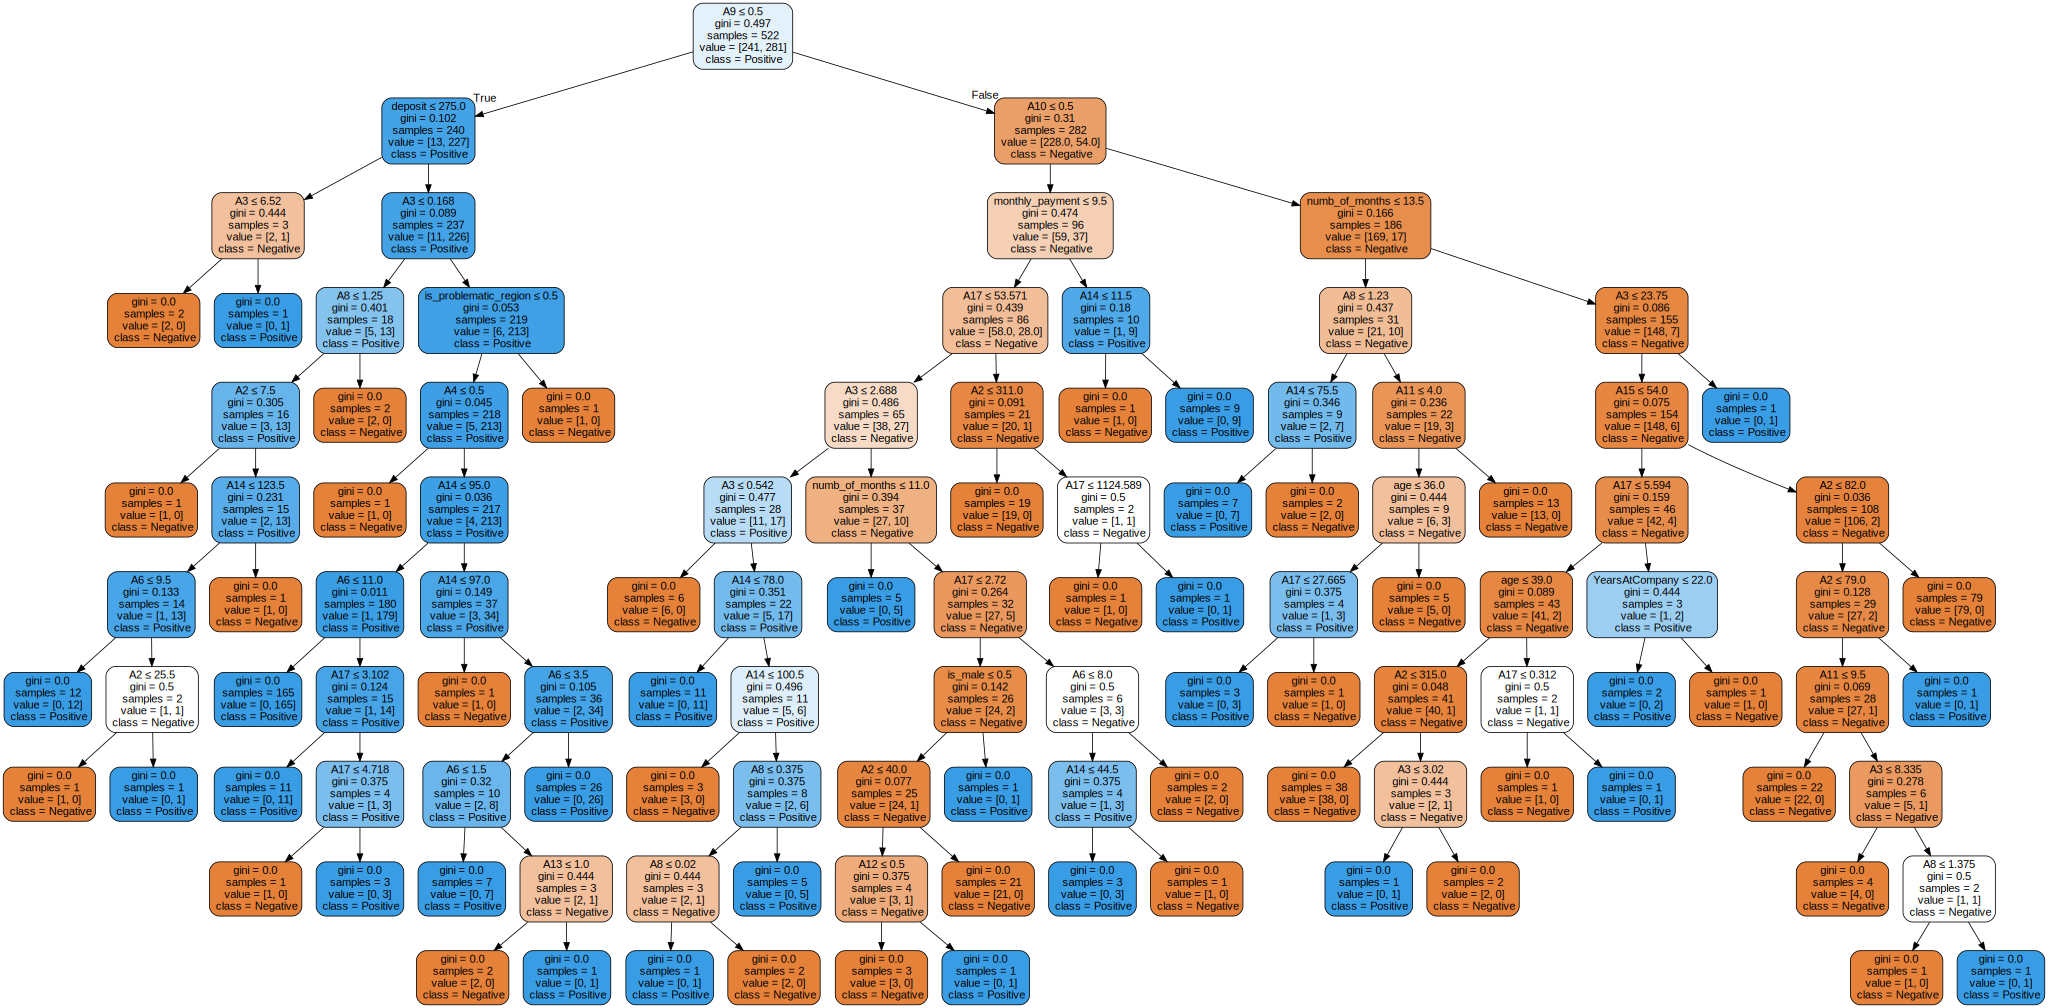

In [73]:
dot_data = export_graphviz(
    clf,
    feature_names=X.columns,
    class_names=['Negative', 'Positive'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph

In [74]:
clf = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy after LGBMClassifier booster:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 281, number of negative: 241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 522, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538314 -> initscore=0.153558
[LightGBM] [Info] Start training from score 0.153558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

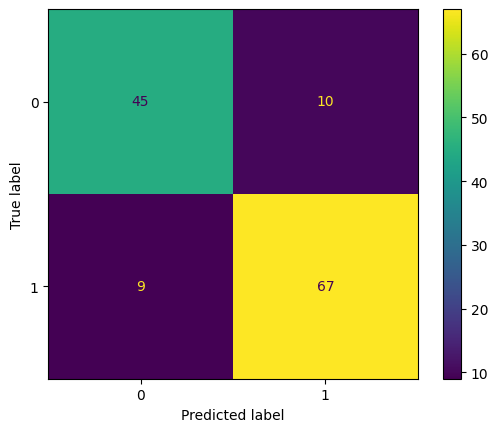

In [74]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

- Decision Tree (Initial): Achieved an accuracy of 80.15% with decent performance for both classes. Precision and recall for class 0 were 0.75 and 0.80, while for class 1 they were 0.85 and 0.80, respectively.

- Decision Tree (After Adding Features): Improved accuracy to 86.26%. Both classes showed better balance, with class 0 having precision and recall of 0.84, and class 1 with 0.88 precision and recall, indicating a more reliable model.

- LGBM Classifier: The best performance, with an accuracy of 91.60%. Precision and recall were high across both classes, with class 0 at 0.91 precision and 0.89 recall, and class 1 at 0.92 precision and 0.93 recall.

Overall, the LGBMClassifier achieved the highest accuracy, outperforming the Decision Tree models after feature addition.